In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from cycler import cycler
import matplotlib.cm as cm
# Set Dark2 as the default color cycle
dark2 = cm.get_cmap('Dark2').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=dark2)
%matplotlib widget
from matplotlib.ticker import ScalarFormatter

import sys
sys.path.append("../scripts")
from TrackReconstruction_functions import *
from reconstruction_functions import *



/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_54567/2538075728.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  dark2 = cm.get_cmap('Dark2').colors


In [98]:
# Load in the Bi/Tl/Single files

diff = "nodiff"
# diff = "5percent"
# diff = "0.25percent"
# diff = "0.1percent"
# diff = "0.05percent"
# diff = "0.0percent"
pressure = 15

# Set the detector size depending on the pressure
density = 5.987*pressure
M = 1000/0.9
det_size = 1000*np.cbrt((4 * M) / (np.pi * density))/2.0
print(det_size)

# Load in the signal metadata
nubb_meta = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_{pressure}bar_{diff}_reco.h5", "meta")
nubb_meta["Type"] = "0nubb"
display(nubb_meta)

# ----------------------------------------------------------------------------------------------------

# Load in the background
Bkg_meta = pd.DataFrame()
Tl_meta = pd.DataFrame()
Bi_meta = pd.DataFrame()

Tl_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_reco.h5", "meta")
Tl_meta["Type"] = "Tl"
Bi_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_{diff}_reco.h5", "meta")
Bi_meta["Type"] = "Bi"
single_meta = pd.read_hdf(f"../data/Trackreco/ATPC_single_{pressure}bar_{diff}_reco.h5", "meta")
single_meta["Type"] = "single"

Bkg_meta = pd.concat([Tl_meta, Bi_meta, single_meta])
# Bkg_meta = pd.concat([Tl_meta])
display(Bkg_meta)



1253.4077288057063


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,blob1RTD,blob2RTD,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,contained,Type
0,78,0,1,0,48,175.807,2.457333,0.855703,0.626721,0.883246,0.493918,0.883246,0.493918,1.611661,1.015948,7.072953e-01,0.097793,Primary,True,0nubb
0,79,0,1,2,8,134.585,1.810282,0.738409,0.379067,0.728931,0.245582,0.728931,0.245582,1.147363,1.013683,3.062066e-01,0.086303,Primary,True,0nubb
0,79,1,0,24,18,20.983,0.639487,0.028731,0.000000,0.028731,0.000000,0.066221,0.028731,1.000000,1.000000,5.765323e-17,0.000000,Delta0,True,0nubb
0,80,0,1,27,35,165.711,2.264769,0.814150,0.552836,0.866730,0.646340,0.866730,0.646340,1.412837,1.274696,5.433928e-01,0.419017,Primary,True,0nubb
0,80,1,0,54,54,0.000,0.030234,0.030234,0.030234,0.030234,0.030234,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Brem,True,0nubb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,845,0,1,22,46,194.098,2.455274,0.658349,0.623171,0.642000,0.593030,0.642000,0.593030,1.444682,1.187940,6.714002e-01,0.362385,Primary,True,0nubb
0,846,0,1,29,55,165.222,2.458275,0.625712,0.589448,1.119466,0.421052,1.119466,0.421052,1.256260,1.153469,4.359353e-01,0.275489,Primary,True,0nubb
0,847,0,1,8,38,137.706,2.454059,0.680982,0.573992,0.931376,0.718042,0.931376,0.718042,1.251370,1.168012,3.813545e-01,0.223123,Primary,True,0nubb
0,849,0,1,32,44,155.241,2.449843,1.015613,0.681012,0.988418,0.768353,0.988418,0.768353,1.133679,1.074617,3.071404e-01,0.160301,Primary,True,0nubb


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,blob1RTD,blob2RTD,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,contained,Type
0,70006,0,1,14,57,179.282,2.205286,0.729994,0.322890,0.820756,0.161433,0.820756,0.161433,1.147418,1.029887,0.311784,0.123274,Primary,True,Tl
0,70006,1,0,12,0,11.821,0.030486,0.030486,0.000000,0.030486,0.000000,0.047874,0.030486,0.000000,0.000000,0.000000,0.000000,Delta0,True,Tl
0,70006,2,0,58,58,0.000,0.036191,0.036191,0.036191,0.036191,0.036191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True,Tl
0,70006,3,0,59,59,0.000,0.189661,0.189661,0.189661,0.189661,0.189661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True,Tl
0,70014,0,1,11,61,166.869,1.770945,0.477173,0.245000,0.425394,0.189028,0.425394,0.189028,1.095440,1.047635,0.286416,0.181045,Primary,False,Tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,42705,3,0,19,19,0.000,0.073694,0.073694,0.073694,0.073694,0.073694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True,single
0,42724,0,1,0,57,160.608,2.231037,0.573173,0.388359,0.730745,0.146184,0.868840,0.146184,1.697188,1.011420,0.591254,0.078166,Primary,True,single
0,42724,1,0,48,40,13.976,0.196127,0.021015,0.000000,0.021015,0.000000,0.057734,0.021015,1.000000,1.000000,0.000000,0.000000,Delta0,True,single
0,42724,2,0,34,34,0.000,0.026696,0.026696,0.026696,0.026696,0.026696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True,single


In [99]:
def FilterSingleTracks(df_meta):

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]
    df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    # Apply containment
    df_meta = df_meta[df_meta.contained == True]
    df_primary = df_primary[df_primary.contained == True]
    df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, 1.0)

    # This is common for all NEXT-tonne analysis
    df_counts = GetNTracks(df_meta)
    df_counts = df_counts[df_counts.N_tracks == 1]
    df_meta = df_meta[df_meta["event_id"].isin(df_counts.event_id.unique())]
    df_primary = df_primary[df_primary["event_id"].isin(df_counts.event_id.unique())]

    return df_primary


Tl_stracks = FilterSingleTracks(Tl_meta)
Bi_stracks = FilterSingleTracks(Bi_meta)
single_stracks = FilterSingleTracks(single_meta)

print(len(Tl_stracks), len(Bi_stracks), len(single_stracks))


1300 13027 72332


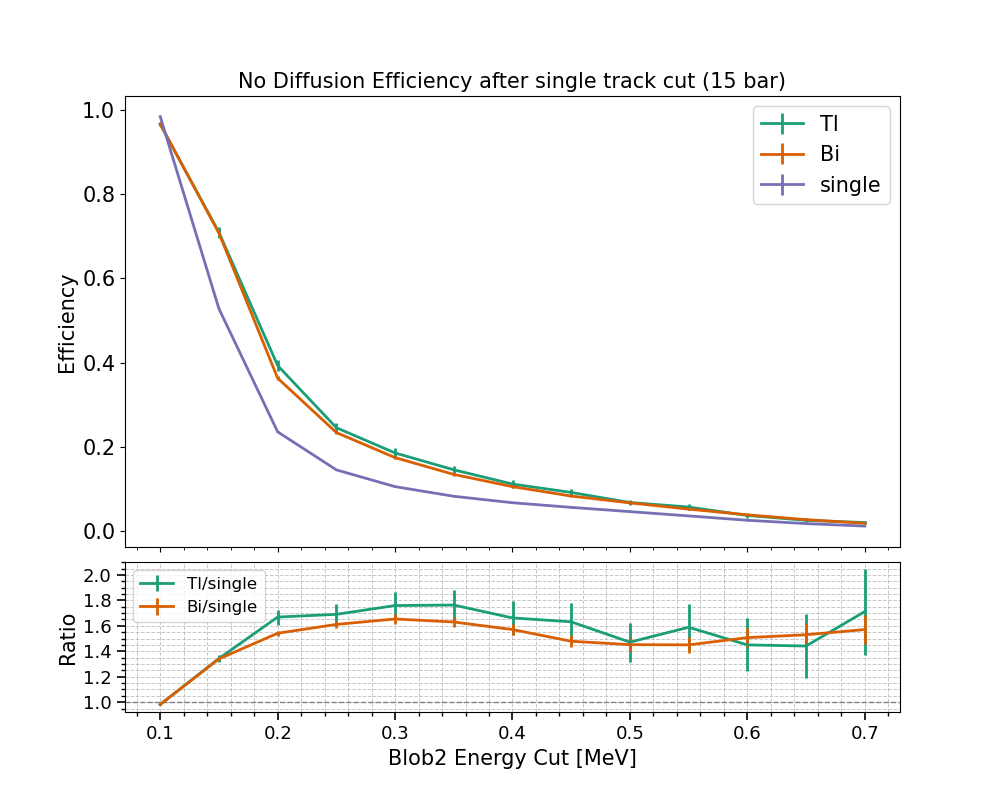

In [100]:
def ApplyVariableBlob2ECut(primary, E):

    cuts = (primary.blob2R > E)
    df_primary = primary[ cuts ]

    return len(df_primary)

E_cut_range = np.arange(0.1, 0.75, 0.05)
Tl_Ecut = []
Bi_Ecut = []
single_Ecut = []

def CalcEff(n, N):
    efficiency = n/N
    error=np.sqrt( (efficiency/N) * (1-efficiency)  )
    return efficiency, error

def CalcRatioErr(frac_x, frac_y, f):
    return f * np.sqrt(frac_x**2 + frac_y**2)


for E_cut in E_cut_range:

    Tl_Ecut.append(ApplyVariableBlob2ECut(Tl_stracks, E_cut))
    Bi_Ecut.append(ApplyVariableBlob2ECut(Bi_stracks, E_cut))
    single_Ecut.append(ApplyVariableBlob2ECut(single_stracks, E_cut))

Tl_Ecut = np.array(Tl_Ecut)
Bi_Ecut = np.array(Bi_Ecut)
single_Ecut = np.array(single_Ecut)

Tl_eff, Tl_err = CalcEff(Tl_Ecut, len(Tl_stracks))
Bi_eff, Bi_err = CalcEff(Bi_Ecut, len(Bi_stracks))
single_eff, single_err = CalcEff(single_Ecut, len(single_stracks))


if (diff == "0.05percent"):
    diff_label = "helium"
    diff_title = "10% Helium"
elif (diff == "nodiff"):
    diff_label = "nodiff"
    diff_title = "No Diffusion"
else:
    diff_label = f"{diff}co2"
    diff_title = "5% CO$_2$"


fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1, figsize=(10, 8),
    sharex=True,
    gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05}
)

# --- Top panel (efficiencies) ---
ax_top.errorbar(E_cut_range, Tl_eff, yerr=Tl_err, linewidth=2, label="Tl")
ax_top.errorbar(E_cut_range, Bi_eff, yerr=Bi_err, linewidth=2, label="Bi")
ax_top.errorbar(E_cut_range, single_eff, yerr=single_err, linewidth=2, label="single")

ax_top.set_ylabel("Efficiency", fontsize=15)
ax_top.set_title(f"{diff_title} Efficiency after single track cut ({pressure} bar)", fontsize=15)
ax_top.tick_params(axis='both', which='both', labelsize=15)
ax_top.legend(fontsize=15)

# --- Bottom panel (ratio to single) ---
# Avoid division by zero
Tl_ratio = np.divide(Tl_eff, single_eff, out=np.zeros_like(Tl_eff), where=single_eff!=0)
Bi_ratio = np.divide(Bi_eff, single_eff, out=np.zeros_like(Bi_eff), where=single_eff!=0)

Tl_ratio_err = CalcRatioErr(single_err/single_eff, Tl_err/Tl_eff, Tl_eff/single_eff)
Bi_ratio_err = CalcRatioErr(single_err/single_eff, Bi_err/Bi_eff, Bi_eff/single_eff)


ax_bottom.errorbar(E_cut_range, Tl_ratio, yerr=Tl_ratio_err, linewidth=2, label="Tl/single")
ax_bottom.errorbar(E_cut_range, Bi_ratio, yerr=Bi_ratio_err, linewidth=2, label="Bi/single")

ax_bottom.axhline(1.0, color='gray', linestyle='--', linewidth=1)
ax_bottom.set_xlabel("Blob2 Energy Cut [MeV]", fontsize=15)
ax_bottom.set_ylabel("Ratio", fontsize=15)
ax_bottom.tick_params(axis='both', which='both', labelsize=15)
ax_bottom.legend(fontsize=12)

# Add grid and increase tick density
ax_bottom.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
ax_bottom.minorticks_on()
ax_bottom.tick_params(axis='both', which='major', length=6, width=1.2, labelsize=13)
ax_bottom.tick_params(axis='both', which='minor', length=3, width=1)

# You can fine-tune number of ticks (optional)
ax_bottom.yaxis.set_major_locator(plt.MaxNLocator(6))   # more y ticks

plt.show()



plt.savefig(f"plots/GammaSingleComparisons/GammaSingleComp_{pressure}bar_{diff_label}.pdf")
